In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("./xlsx/Join_data.xlsx", index_col = 0)    

# 컬럼 추출
all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all2.set_index("DateTime")

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs',
            "대비_국고10년",
            "대비_ndf", "전일종가_ex"]]

# DateTime을 인덱스로 바꿔주기
df.head(2)

,종가_ex,1Y_대비_irs,10Y_대비_irs,1Y_대비_crs,대비_국고10년,대비_ndf,전일종가_ex
DateTime,,,,,,,
2012-08-02,1131.7,-0.03,-0.05,-0.01,-0.04,1.75,1126.5
2012-08-03,1134.8,-0.03,-0.02,-0.01,-0.07,4.00,1131.7


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 쓸 칼럼만 남기고 feature, target 분리해 각각 x,y 에 저장
x = df[['1Y_대비_irs', '10Y_대비_irs',  
            '1Y_대비_crs',
            "대비_국고10년",
            "대비_ndf", "전일종가_ex"]]
y = df[["종가_ex"]]

# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

# scaling 진행
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,1Y_대비_irs,10Y_대비_irs,1Y_대비_crs,대비_국고10년,대비_ndf,전일종가_ex
DateTime,,,,,,
2012-08-02,-0.847862,-1.009126,-0.205336,-1.027569,0.079167,-0.149841
2012-08-03,-0.847862,-0.403231,-0.205336,-1.798403,0.184972,-0.056232
2012-08-06,0.560374,0.202663,-0.003044,0.000209,-0.449862,-0.000426
2012-08-07,0.278727,0.404628,0.401540,0.000209,0.020386,-0.104837
2012-08-08,0.278727,0.606592,0.199248,-0.513680,0.055654,-0.108437
...,...,...,...,...,...,...
2022-07-25,-1.129510,-2.220914,-1.621379,-2.312292,0.154406,3.207485
2022-07-26,-0.284568,-0.605196,0.199248,-0.770625,0.050952,3.220086
2022-07-27,-0.284568,-1.211091,0.199248,-1.541458,-0.026639,3.110275


In [3]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,1Y_대비_irs,10Y_대비_irs,1Y_대비_crs,대비_국고10년,대비_ndf,전일종가_ex,종가_ex
DateTime,,,,,,,
2012-08-02,-0.847862,-1.009126,-0.205336,-1.027569,0.079167,-0.149841,1131.7
2012-08-03,-0.847862,-0.403231,-0.205336,-1.798403,0.184972,-0.056232,1134.8
2012-08-06,0.560374,0.202663,-0.003044,0.000209,-0.449862,-0.000426,1129.0
2012-08-07,0.278727,0.404628,0.401540,0.000209,0.020386,-0.104837,1128.8
2012-08-08,0.278727,0.606592,0.199248,-0.513680,0.055654,-0.108437,1128.3
...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-2.220914,-1.621379,-2.312292,0.154406,3.207485,1313.7
2022-07-26,-0.284568,-0.605196,0.199248,-0.770625,0.050952,3.220086,1307.6
2022-07-27,-0.284568,-1.211091,0.199248,-1.541458,-0.026639,3.110275,1313.3


In [4]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['1Y_대비_irs', '10Y_대비_irs','1Y_대비_crs', '대비_국고10년', '대비_ndf', '전일종가_ex']
label_cols = ['종가_ex']

In [5]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 6), (389, 1, 6))

In [6]:
x_train

array([[[-2.84567957e-01, -2.01266649e-01,  1.99248003e-01,
         -5.13680169e-01, -1.20688685e-01, -1.35415782e+00]],

       [[ 5.60373809e-01,  6.06592466e-01, -2.05335679e-01,
          2.57153559e-01,  1.42650162e-01, -2.92054738e-01]],

       [[-2.92070151e-03,  2.02662908e-01,  1.21070721e+00,
          2.08982982e-04, -4.12242408e-01, -6.01684789e-01]],

       ...,

       [[-2.92070151e-03,  2.02662908e-01,  6.03831686e-01,
         -2.56735593e-01, -1.81820917e-01,  1.09384223e-01]],

       [[-8.47862468e-01, -8.07160985e-01, -6.09919362e-01,
         -5.13680169e-01, -1.08234572e+00,  8.78058827e-01]],

       [[-2.92070151e-03,  6.98129573e-04, -4.07627521e-01,
         -2.56735593e-01, -7.75459699e-04, -8.66310473e-01]]])

In [7]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((513, 1, 6), (513, 1))

In [19]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일(모델학습을 위한 학습과정 설정단계)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
print("\n Test Accuracy: %.4f" % model.evaluate(x_valid, y_valid))     

Epoch 1/200
92/98 [===========================>..] - ETA: 0s - loss: 1264926.1250 - mae: 1123.5696
Epoch 1: val_loss improved from inf to 1271041.62500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 13s 79ms/step - loss: 1265353.0000 - mae: 1123.7357 - val_loss: 1271041.6250 - val_mae: 1126.3025
Epoch 2/200
85/98 [=========================>....] - ETA: 0s - loss: 1263819.8750 - mae: 1123.0289
Epoch 2: val_loss improved from 1271041.62500 to 1269542.62500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 8s 82ms/step - loss: 1264187.0000 - mae: 1123.2151 - val_loss: 1269542.6250 - val_mae: 1125.6350
Epoch 3/200
87/98 [=========================>....] - ETA: 0s - loss: 1261277.0000 - mae: 1121.9202
Epoch 3: val_loss improved from 1269542.62500 to 1266620.50000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 73ms/step -

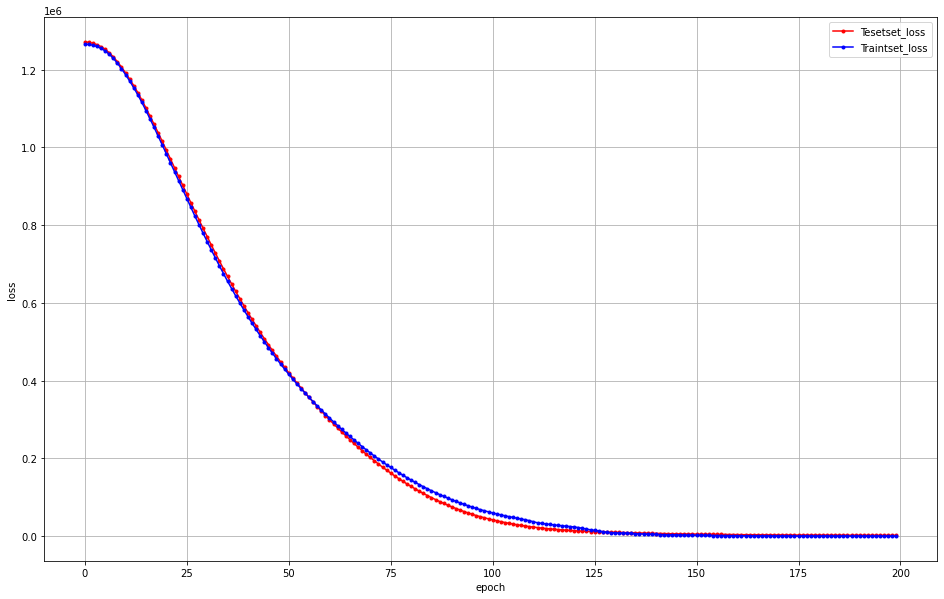

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Tesetset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Traintset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()